In [462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [463]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [464]:
train

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [465]:
test

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN


In [466]:
train.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [467]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [468]:
train.shape

(13320, 9)

In [469]:
test[test.index == 135]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
135,Super built-up Area,Ready To Move,Bhoganhalli,4 BHK,Pride S,2439,4.0,3.0,NaN


In [470]:
#test.drop_duplicates(inplace = True)

In [471]:
train.drop_duplicates(inplace = True)

In [472]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,12718.0,2.708602,1.357764,1.0,2.0,2.0,3.0,40.0
balcony,12186.0,1.582308,0.822536,0.0,1.0,2.0,2.0,3.0
price,12791.0,114.317646,151.480310,8.0,50.0,73.0,121.0,3600.0


In [473]:
train["data"] = "train"
test["data"] = "test"

In [474]:
test_train_combined = pd.concat([train,test])

In [475]:
test_train_combined

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train
...,...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN,test
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN,test
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN,test
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN,test


In [476]:
test_train_combined = test_train_combined.reset_index().drop(columns="index")

In [477]:
test_train_combined

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train
...,...,...,...,...,...,...,...,...,...,...
14266,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN,test
14267,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN,test
14268,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN,test
14269,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN,test


In [478]:
test_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14271 non-null  object 
 1   availability  14271 non-null  object 
 2   location      14270 non-null  object 
 3   size          14253 non-null  object 
 4   society       8317 non-null   object 
 5   total_sqft    14271 non-null  object 
 6   bath          14191 non-null  float64
 7   balcony       13597 non-null  float64
 8   price         12791 non-null  float64
 9   data          14271 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [479]:
test_train_combined.isna().sum()

area_type          0
availability       0
location           1
size              18
society         5954
total_sqft         0
bath              80
balcony          674
price           1480
data               0
dtype: int64

In [480]:
train.shape

(12791, 10)

In [481]:
test_train_combined['area_type'].value_counts()

Super built-up  Area    9263
Built-up  Area          2668
Plot  Area              2243
Carpet  Area              97
Name: area_type, dtype: int64

In [482]:
test_train_combined['availability'].value_counts()

Ready To Move    11334
18-Dec             328
18-May             321
18-Apr             294
18-Aug             212
                 ...  
15-Jun               1
15-Dec               1
16-Oct               1
16-Apr               1
16-Jan               1
Name: availability, Length: 82, dtype: int64

In [483]:
test_train_combined['location'].value_counts()

Whitefield                               574
Sarjapur  Road                           417
Electronic City                          322
Kanakpura Road                           274
Thanisandra                              272
                                        ... 
Bahubali Nagar                             1
akshaya nagar t c palya                    1
BDS Layout                                 1
Bidere Agarahara, Behind Safal market      1
near ullas theater                         1
Name: location, Length: 1358, dtype: int64

In [484]:
test_train_combined['size'].value_counts()

2 BHK         5471
3 BHK         4598
4 Bedroom      916
4 BHK          656
3 Bedroom      601
1 BHK          575
2 Bedroom      353
5 Bedroom      332
6 Bedroom      208
1 Bedroom      121
8 Bedroom       94
7 Bedroom       94
5 BHK           61
9 Bedroom       54
6 BHK           35
7 BHK           18
10 Bedroom      15
1 RK            15
9 BHK           13
8 BHK            8
10 BHK           2
11 BHK           2
11 Bedroom       2
14 BHK           1
43 Bedroom       1
18 Bedroom       1
16 Bedroom       1
27 BHK           1
19 BHK           1
12 Bedroom       1
13 BHK           1
16 BHK           1
Name: size, dtype: int64

In [485]:
test_train_combined['society'].value_counts()

GrrvaGr    80
PrarePa    65
Bhmesy     63
Sryalan    60
Prtates    59
           ..
Amelllu     1
Emsic C     1
Sagnage     1
K ensad     1
Soe 2Sa     1
Name: society, Length: 2832, dtype: int64

In [486]:
test_train_combined['total_sqft'].nunique()

2221

In [487]:
test_train_combined['bath'].value_counts()

2.0     7290
3.0     3551
4.0     1347
1.0      845
5.0      582
6.0      301
7.0      113
8.0       73
9.0       51
10.0      17
12.0       7
13.0       3
11.0       3
16.0       3
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [488]:
test_train_combined['balcony'].value_counts()

2.0    5391
1.0    5247
3.0    1819
0.0    1140
Name: balcony, dtype: int64

In [489]:
test_train_combined['price'].value_counts()

75.000    300
65.000    296
55.000    265
60.000    263
45.000    231
         ... 
64.440      1
49.810      1
28.095      1
45.950      1
74.820      1
Name: price, Length: 1994, dtype: int64

In [490]:
test_train_combined.isna().sum()

area_type          0
availability       0
location           1
size              18
society         5954
total_sqft         0
bath              80
balcony          674
price           1480
data               0
dtype: int64

In [491]:
test_train_combined[test_train_combined['size'] == '2 BHK'].total_sqft.value_counts()

1200           247
1100           189
1000           134
1050            99
1150            93
              ... 
1478             1
842              1
1070 - 1315      1
1250 - 1305      1
1448             1
Name: total_sqft, Length: 756, dtype: int64

In [492]:
test_train_combined['size'].value_counts()

2 BHK         5471
3 BHK         4598
4 Bedroom      916
4 BHK          656
3 Bedroom      601
1 BHK          575
2 Bedroom      353
5 Bedroom      332
6 Bedroom      208
1 Bedroom      121
8 Bedroom       94
7 Bedroom       94
5 BHK           61
9 Bedroom       54
6 BHK           35
7 BHK           18
10 Bedroom      15
1 RK            15
9 BHK           13
8 BHK            8
10 BHK           2
11 BHK           2
11 Bedroom       2
14 BHK           1
43 Bedroom       1
18 Bedroom       1
16 Bedroom       1
27 BHK           1
19 BHK           1
12 Bedroom       1
13 BHK           1
16 BHK           1
Name: size, dtype: int64

In [493]:
test_train_combined[test_train_combined.area_type == 'Super built-up Area']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data


In [494]:
test_train_combined["size"].replace({
    '4 Bedroom':'4 BHK', 
    '3 Bedroom':'3 BHK', 
    '2 Bedroom': '2 BHK',
    '1 Bedroom': '1 BHK',
    '5 Bedroom': '5 BHK',
    '6 Bedroom': '6 BHK',
    '7 Bedroom': '7 BHK',
    '8 Bedroom': '8 BHK',
    '9 Bedroom': '9 BHK',
    '10 Bedroom': '10 BHK',
    '11 Bedroom': '11 BHK',
    '12 Bedroom': '12 BHK',
    '43 Bedroom': '43 BHK',
    '18 Bedroom': '18 BHK',
    '16 Bedroom': '16 BHK',    
}, inplace = True)

In [495]:
test_train_combined["size"]

0        2 BHK
1        4 BHK
2        3 BHK
3        3 BHK
4        2 BHK
         ...  
14266    2 BHK
14267    3 BHK
14268    2 BHK
14269    2 BHK
14270    2 BHK
Name: size, Length: 14271, dtype: object

In [496]:
test_train_combined.replace({ 1: 43560, '1.25Acres': 54450, '1.26Acres': 54885.6 }, inplace = True)

In [497]:
test_train_combined.total_sqft.value_counts()

1200    905
1500    235
1100    229
2400    224
600     198
       ... 
714       1
2401      1
1646      1
869       1
3445      1
Name: total_sqft, Length: 2221, dtype: int64

In [498]:
test_train_combined.isna().sum()

area_type          0
availability       0
location           1
size              18
society         5954
total_sqft         0
bath              80
balcony          674
price           1480
data               0
dtype: int64

In [499]:
test_train_combined.society.fillna('none', inplace=True)

In [500]:
test_train_combined.balcony.fillna(0, inplace=True)

In [501]:
test_train_combined.groupby('size').bath.agg(pd.Series.mode)

size
1 BHK                      43560
1 RK                       43560
10 BHK                        10
11 BHK    [6.0, 9.0, 11.0, 12.0]
12 BHK                         6
13 BHK                        13
14 BHK                        15
16 BHK                        16
18 BHK                        18
19 BHK                        16
2 BHK                          2
27 BHK                        27
3 BHK                          3
4 BHK                          4
43 BHK                        40
5 BHK                          5
6 BHK                          6
7 BHK                          7
8 BHK                          8
9 BHK                          9
Name: bath, dtype: object

In [502]:
from scipy.stats import mode
rt = test_train_combined.groupby('total_sqft')['size'].agg(lambda x: mode(x).mode[0]).reset_index()

In [503]:
rt[(rt['size'] == '2 BHK')]

,total_sqft,size
0,54450,2 BHK
3,1000,2 BHK
4,1000 - 1285,2 BHK
7,1001,2 BHK
8,1002,2 BHK
...,...,...
2216,995,2 BHK
2217,996,2 BHK
2218,997,2 BHK
2219,998,2 BHK


In [504]:
test_train_combined['size'] = test_train_combined.groupby('total_sqft')['size'].transform(lambda x: x.fillna(mode(x).mode[0]))

In [505]:
test_train_combined['size'].isna().sum()

0

In [506]:
test_train_combined['bath'] = test_train_combined.groupby('size').bath.transform(lambda x: x.fillna(mode(x).mode[0]))

In [507]:
test_train_combined['bath'].fillna(0, inplace=True)

In [508]:
test_train_combined[test_train_combined['bath'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data


In [509]:
test_train_combined.isna().sum()

area_type          0
availability       0
location           1
size               0
society            0
total_sqft         0
bath               0
balcony            0
price           1480
data               0
dtype: int64

In [510]:
test_train_combined[test_train_combined['location'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0,train


In [511]:
test_train_combined['location'].fillna('none', inplace=True)

<AxesSubplot:xlabel='area_type'>

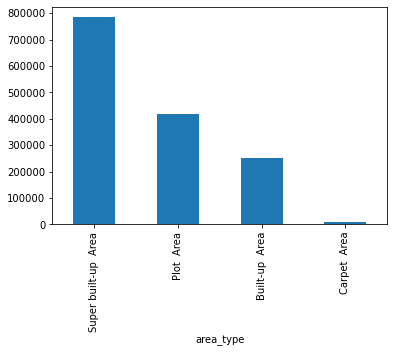

In [372]:
test_train_combined.groupby("area_type").price.sum().sort_values(ascending=False).plot(kind = "bar")

In [512]:
test_train_combined.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'data'],
      dtype='object')

<AxesSubplot:xlabel='location'>

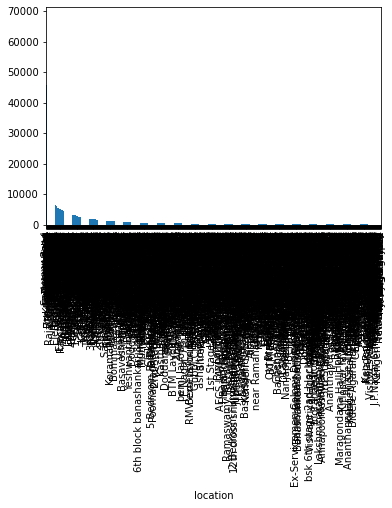

In [374]:
test_train_combined.groupby("location").price.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='size'>

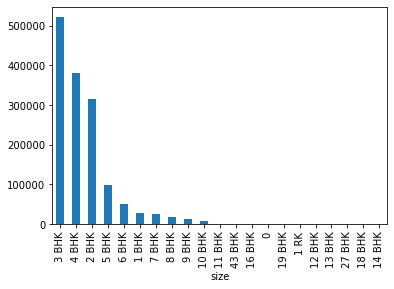

In [375]:
test_train_combined.groupby("size").price.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='society'>

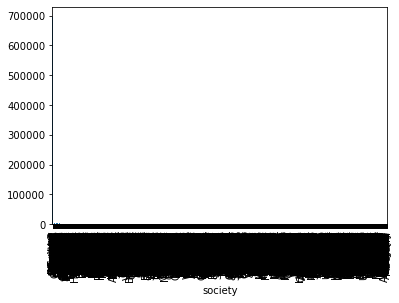

In [376]:
test_train_combined.groupby("society").price.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='total_sqft'>

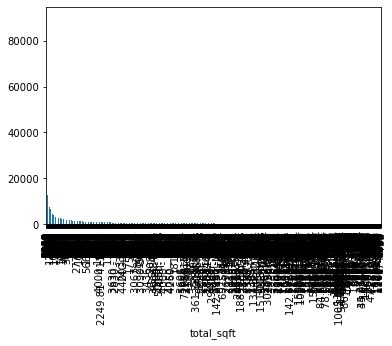

In [377]:
test_train_combined.groupby("total_sqft").price.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='bath'>

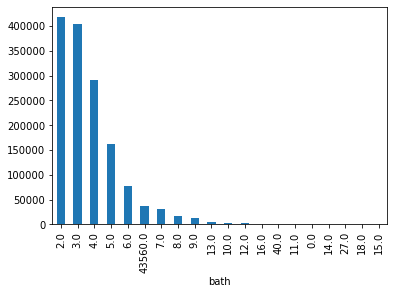

In [378]:
test_train_combined.groupby("bath").price.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='balcony'>

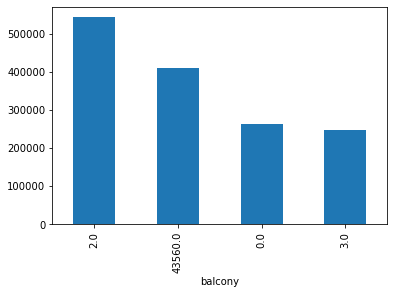

In [379]:
test_train_combined.groupby("balcony").price.sum().sort_values(ascending=False).plot(kind = "bar")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

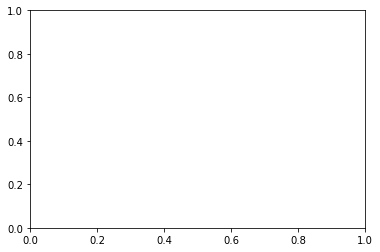

In [380]:
test_train_combined.boxplot(column = "size", by = "price", rot = 90)

<AxesSubplot:ylabel='Frequency'>

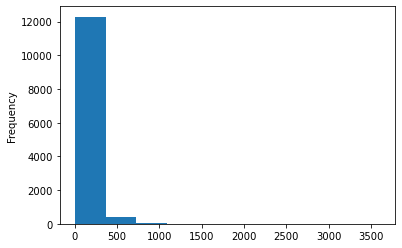

In [513]:
test_train_combined["price"].plot(kind = "hist")

<AxesSubplot:xlabel='availability', ylabel='price'>

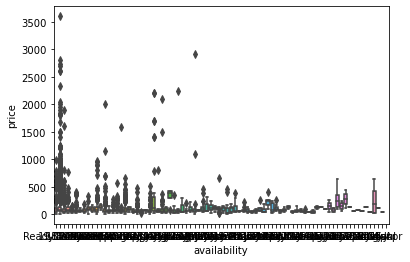

In [382]:
sns.boxplot(data = test_train_combined, x = "availability", y = "price")

<AxesSubplot:xlabel='bath', ylabel='price'>

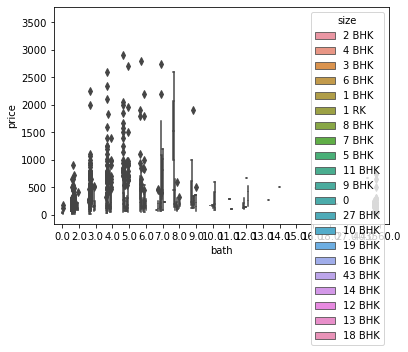

In [383]:
sns.boxplot(data = test_train_combined, x = "bath", y = "price", hue = "size")

In [514]:
test_train_combined['availability']

0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
14266    Ready To Move
14267    Ready To Move
14268    Ready To Move
14269           18-Feb
14270    Ready To Move
Name: availability, Length: 14271, dtype: object

In [515]:
test_train_combined.select_dtypes(include = np.number).corr()

,bath,balcony,price
bath,1.000000,0.143341,-0.110333
balcony,0.143341,1.000000,-0.136755
price,-0.110333,-0.136755,1.000000


In [516]:
test_train_combined.select_dtypes(exclude = np.number).corr()

""


<AxesSubplot:>

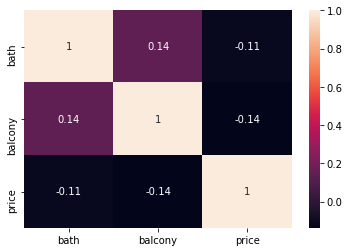

In [517]:
sns.heatmap(test_train_combined.select_dtypes(include = np.number).corr(), annot=True)

In [518]:
numeric_data_columns = test_train_combined.select_dtypes(include = np.number).drop(columns = "price").columns

In [519]:
numeric_data_columns

Index(['bath', 'balcony'], dtype='object')

In [520]:
test_train_combined.select_dtypes(exclude = np.number)

,area_type,availability,location,size,society,total_sqft,data
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,none,1440,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,none,1200,train
...,...,...,...,...,...,...,...
14266,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,test
14267,Super built-up Area,Ready To Move,Gottigere,3 BHK,none,1660,test
14268,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,test
14269,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,test


In [521]:
test_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14271 non-null  object 
 1   availability  14271 non-null  object 
 2   location      14271 non-null  object 
 3   size          14271 non-null  object 
 4   society       14271 non-null  object 
 5   total_sqft    14271 non-null  object 
 6   bath          14271 non-null  float64
 7   balcony       14271 non-null  float64
 8   price         12791 non-null  float64
 9   data          14271 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [522]:
category_data_columns = test_train_combined.select_dtypes(exclude = np.number).drop(columns=["data"]).columns

In [523]:
preprocess_category_data_columns = pd.get_dummies(test_train_combined[category_data_columns])

In [524]:
preprocess_category_data_columns

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,...,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14267,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14268,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14269,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [525]:
scaler = StandardScaler()

In [526]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(test_train_combined[numeric_data_columns]), columns=numeric_data_columns)

In [527]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, test_train_combined[["data", "price"]]], axis = 1)

In [528]:
final_preprocessed

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,...,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999,bath,balcony,data,price
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.252056,1.311427,train,39.07
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.251765,-0.762471,train,120.00
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.252056,-0.762471,train,62.00
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.251959,1.311427,train,95.00
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.252056,1.311427,train,51.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.252056,1.311427,test,NaN
14267,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.251959,-0.762519,test,NaN
14268,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.252056,-0.762519,test,NaN
14269,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,-0.252056,1.311427,test,NaN


In [529]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [530]:
train_preprocessed.shape

(12791, 6524)

In [531]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [532]:
test_preprocessed.shape

(1480, 6524)

In [533]:
test_preprocessed = test_preprocessed.drop(columns = ["data","price"])

In [534]:
train_preprocessed = train_preprocessed.drop(columns = ["data"])

In [535]:
train_preprocessed.to_csv("train_preprocessed_housing_price_bengaluru.csv")
test_preprocessed.to_csv("test_preprocessed_housing_price_bengaluru.csv")

In [540]:
train_preprocessed.head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,...,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999,bath,balcony,price
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.252056,1.311427,39.07
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.251765,-0.762471,120.00
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.252056,-0.762471,62.00
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.251959,1.311427,95.00
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.252056,1.311427,51.00


In [541]:
test_preprocessed.head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,...,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999,bath,balcony
12791,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.252056,-0.762519
12792,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.251378,-0.762519
12793,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.251765,-0.762519
12794,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.251959,1.311427
12795,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.252056,1.311427


In [553]:
#model
test.shape

(1480, 10)

In [543]:
model = LinearRegression()

In [544]:
X = train_preprocessed.drop(columns=["price"])

In [545]:
y = train_preprocessed["price"]

In [546]:
model.fit(X,y)

LinearRegression()

In [547]:
mean_squared_error(y, model.predict(X),squared=False)

46.32694406950212

In [548]:
X_test = test_preprocessed

In [549]:
y_pred = model.predict(X_test)

In [550]:
submission_result = pd.DataFrame(y_pred)

In [551]:
submission_result.to_csv('submission_housing_price_bengaluru.csv')

In [563]:
test['price'] = submission_result

In [573]:
del test['data']

In [575]:
test.to_csv('submission_housing_price_bengaluru.csv')

In [554]:
mean_squared_error(y_pred, model.predict(X_test))

0.0

In [555]:
X_test.shape

(1480, 6522)

In [556]:
X.shape

(12791, 6522)

In [557]:
y.shape

(12791,)

In [558]:
from sklearn.preprocessing import PolynomialFeatures

In [559]:
poly = PolynomialFeatures(degree = 10)

In [560]:
X_poly = poly.fit_transform(X)

KeyboardInterrupt: 

In [ ]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X,y)

In [ ]:
print("Train MSE : ",mean_squared_error(y, model_ridge.predict(X)))

In [ ]:
print("Test MSE : ", mean_squared_error(y_pred, model_ridge.predict(X_test)))

In [ ]:
mean_squared_error(y_pred, model_ridge.predict(X_test)) - mean_squared_error(y, model_ridge.predict(X))

In [447]:
model.coef_

array([ 1.22869803e+13,  1.22869803e+13,  1.22869803e+13, ...,
       -4.66063077e+11, -4.64843750e-01,  1.48437500e-01])

In [448]:
model_ridge.coef_

array([-1.76261684e+01, -1.28119844e+01,  4.81448687e+01, ...,
       -5.38393852e+01,  1.04164193e-02, -7.15249487e-01])

In [449]:
model_lasso = Lasso(0.5)
model_lasso.fit(X,y)

Lasso(alpha=0.5)

In [450]:
print("Train MSE : ",mean_squared_error(y, model_lasso.predict(X)))

Train MSE :  15604.144277828442


In [451]:
print("Test MSE : ", mean_squared_error(y_pred, model_lasso.predict(X_test)))

Test MSE :  3.262979730036536e+26


In [452]:
mean_squared_error(y_pred, model_lasso.predict(X_test)) - mean_squared_error(y, model_lasso.predict(X))

3.262979730036536e+26

In [453]:
model_lasso.coef_

array([-2.27070334, -0.        , 43.66735365, ..., -0.        ,
       -9.16200633, -6.06573802])

In [454]:
model_elasticnet = ElasticNet(l1_ratio=0.5, alpha= 1000)
model_elasticnet.fit(X,y)

ElasticNet(alpha=1000)

In [455]:
print("Train MSE : ",mean_squared_error(y, model_elasticnet.predict(X)))

Train MSE :  22944.49050333591


In [456]:
print("Test MSE : ", mean_squared_error(y_pred, model_elasticnet.predict(X_test)))

Test MSE :  3.262979730036787e+26


In [457]:
mean_squared_error(y_pred, model_elasticnet.predict(X_test)) - mean_squared_error(y, model_elasticnet.predict(X))

3.262979730036787e+26